In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
dataset = pd.read_csv("SalaryPrediction.csv")
dataset.head()

,Age,Years of Experience,Salary
0,32.0,5.0,90000.0
1,28.0,3.0,65000.0
2,45.0,15.0,150000.0
3,36.0,7.0,60000.0
4,52.0,20.0,200000.0


In [23]:
dataset.shape

(375, 3)

In [24]:
dataset.isnull().sum()

Age                    2
Years of Experience    2
Salary                 2
dtype: int64

In [26]:
dataset.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [27]:
dataset["Age"].fillna(dataset["Age"].mean(),inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_7616\706645804.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Age"].fillna(dataset["Age"].mean(),inplace=True)


In [28]:
dataset["Years of Experience"].fillna(dataset["Years of Experience"].mean(), inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_7616\2099505373.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Years of Experience"].fillna(dataset["Years of Experience"].mean(), inplace=True)


In [29]:
dataset.isnull().sum()

Age                    0
Years of Experience    0
Salary                 2
dtype: int64

In [30]:
dataset["Salary"].fillna(dataset["Salary"].mean() , inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_7616\2184505282.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Salary"].fillna(dataset["Salary"].mean() , inplace=True)


In [34]:
dataset.isnull().sum()

Age                    0
Years of Experience    0
Salary                 0
dtype: int64

<Axes: >

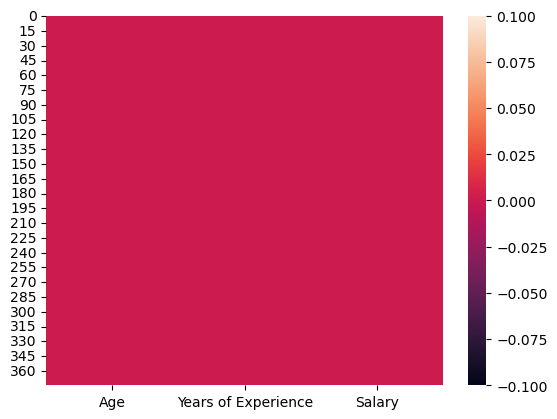

In [32]:
sns.heatmap(dataset.isnull())

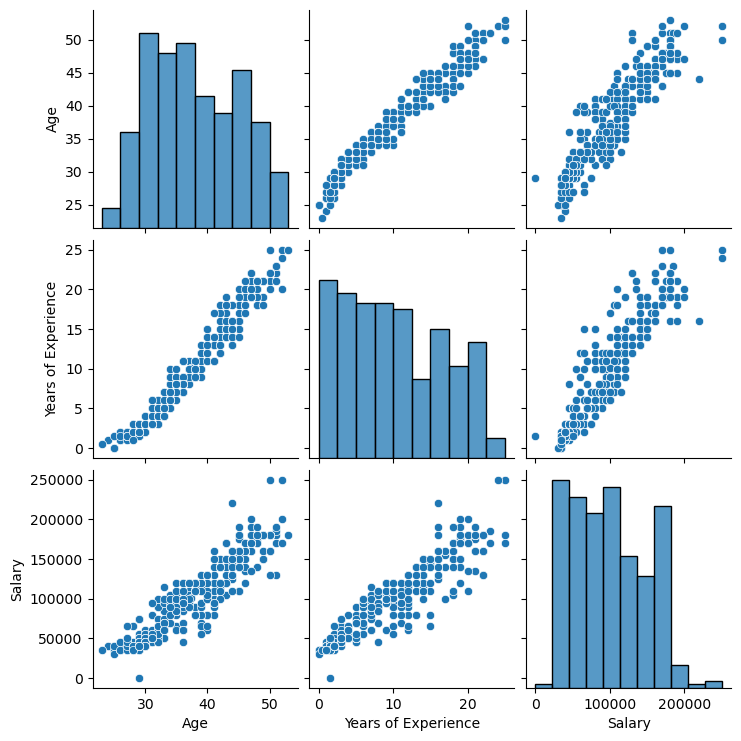

In [35]:
sns.pairplot(dataset)
plt.show()

<Axes: >

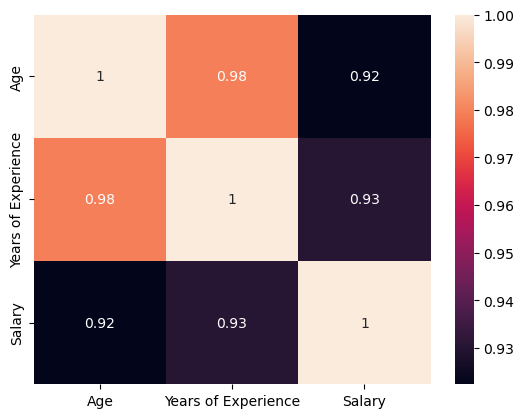

In [36]:
sns.heatmap(dataset.corr(), annot=True)

In [ ]:
x = dataset.iloc[:, :-1]
y = dataset["Salary"]

0       90000.0
1       65000.0
2      150000.0
3       60000.0
4      200000.0
         ...   
370     85000.0
371    170000.0
372     40000.0
373     90000.0
374    150000.0
Name: Salary, Length: 375, dtype: float64

In [40]:
# Split Data 

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [41]:
# Start Model Training 

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train , y_train)

LinearRegression()

In [43]:
# Accuracy 
lr.score(x_test , y_test)*100

88.27679320185007

In [44]:
# y = m1*x1 + m2*x2 + c

lr.coef_

array([2686.96441786, 3987.58791613])

In [45]:
lr.intercept_

-40743.32382000577

In [46]:
# Prediction Line 
# y_prd = 2686.96441786*Age + 3987.58791613*Experience - 40743.32382000577

In [47]:
lr.predict(x_test)

array([154633.62189191, 103924.16763787, 141284.51722394,  74538.99388405,
       142585.1407222 , 174657.27889388, 181331.83122786,  93176.30996642,
        54515.33688209,  94562.65088602, 123947.82463983, 174657.27889388,
        47840.7845481 ,  91875.68646816,  61189.88921608, 141284.51722394,
        65177.4771322 ,  37786.09733645,  78526.58180018,  85201.13413417,
       101237.20322001,  94562.65088602, 143971.4816418 ,  67864.44155007,
        98550.23880215,  55815.96038035, 165295.76214203,  99832.96945177,
       146572.72863833, 150560.31655445,  46454.4436285 , 125248.4481381 ,
        51828.37246423, 137296.92930781,  75839.61738232,  23050.65174888,
       169283.35005815,  47840.7845481 ,  37092.92687666,  58502.92479822,
        47840.7845481 ,  87888.09855203, 193294.59497624, 163995.13864376,
        42466.85571238, 141284.51722394,  99850.86230041,  39779.89129452,
        45153.82013024,  42466.85571238, 103924.16763787,  82514.16971631,
        85201.13413417, 1

In [51]:
lr.predict([[32,5]])

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([65177.4771322])